# Assignment 

In [36]:
import numpy as np , pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Importing data 

In [37]:
df=pd.read_excel('Active Users (4) (1) (1).xlxs')

In [38]:
df.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


# Preprocessing

In [39]:
df.isnull().sum()

w1     2255
w2     2360
w3     2282
w4     1898
w5     1821
w6     1857
w7     1463
w8     1139
w9     1219
w10    1193
w11    1268
w12    1108
w13     934
w14     963
w15    1061
w16     948
w17     969
w18     915
w19     946
w20     912
w21    1023
w22     767
w23     820
w24     905
w25     913
w26     827
w27     829
w28     939
w29    1169
w30    1329
w31    1362
w32    1457
w33    1485
w34    1080
w35    1127
w36     833
w37     915
w38     613
w39     277
w40     268
w41       0
w42     566
w43     865
w44     796
w45     923
w46     431
w47     407
w48     192
w49     151
w50     260
w51     213
w52     246
w53     273
w54     105
w55     208
w56     318
dtype: int64

In [40]:
cols = df.columns
weekly = {}
for i in cols:
        weekly[i] = df[i].dropna().tolist()
        

### Calculating the new_users , retained_users , churned_users and resurrected_users
    # New Users: Users in the current week not present in the previous week.
    # Resurrected Users: Users in the current week who were inactive (not present) in the previous week.
    # Retained Users: Users present in both the current and previous weeks.
    # Churned Users: Users present in the previous week but not in the current week.

    #### source - chatgpt 

In [41]:
all_previous=set()
def user_classification(c_week, p_week):
    curr = set(c_week)
    pre = set(p_week)
    for i in pre:
        all_previous.add(i)
   
    new_users = curr - all_previous
    resurrected_users =new_users.difference(curr.difference(pre))

    churned_users = pre - curr
    retained_users = curr.intersection(pre)

    return len(new_users), len(resurrected_users), len(retained_users), len(churned_users)


## Creating the data frame for the values 

In [42]:
new_users_list = []
resurrected_users_list = []
retained_users_list = []
churned_users_list = []


weeks = list(weekly.keys())
for i in range(1, len(weeks)):
    c_week = weekly[weeks[i]]
    p_week = weekly[weeks[i - 1]]
    new_users, resurrected_users, retained_users, churned_users = user_classification(c_week, p_week)
    
    new_users_list.append(new_users)
    resurrected_users_list.append(resurrected_users)
    retained_users_list.append(retained_users)
    churned_users_list.append(churned_users)


week1 = weekly[weeks[0]]
new_users_list.insert(0, len(week1))
resurrected_users_list.insert(0, 0)
retained_users_list.insert(0, 0)
churned_users_list.insert(0, 0)



final = pd.DataFrame({
    'Week': weeks,
    
    'New Users': new_users_list,
    'Churned Users': churned_users_list,
    'Retained Users': retained_users_list,
    'Resurrected Users': resurrected_users_list
    
})

## Plotting the graph for the Weekly growth accounting 

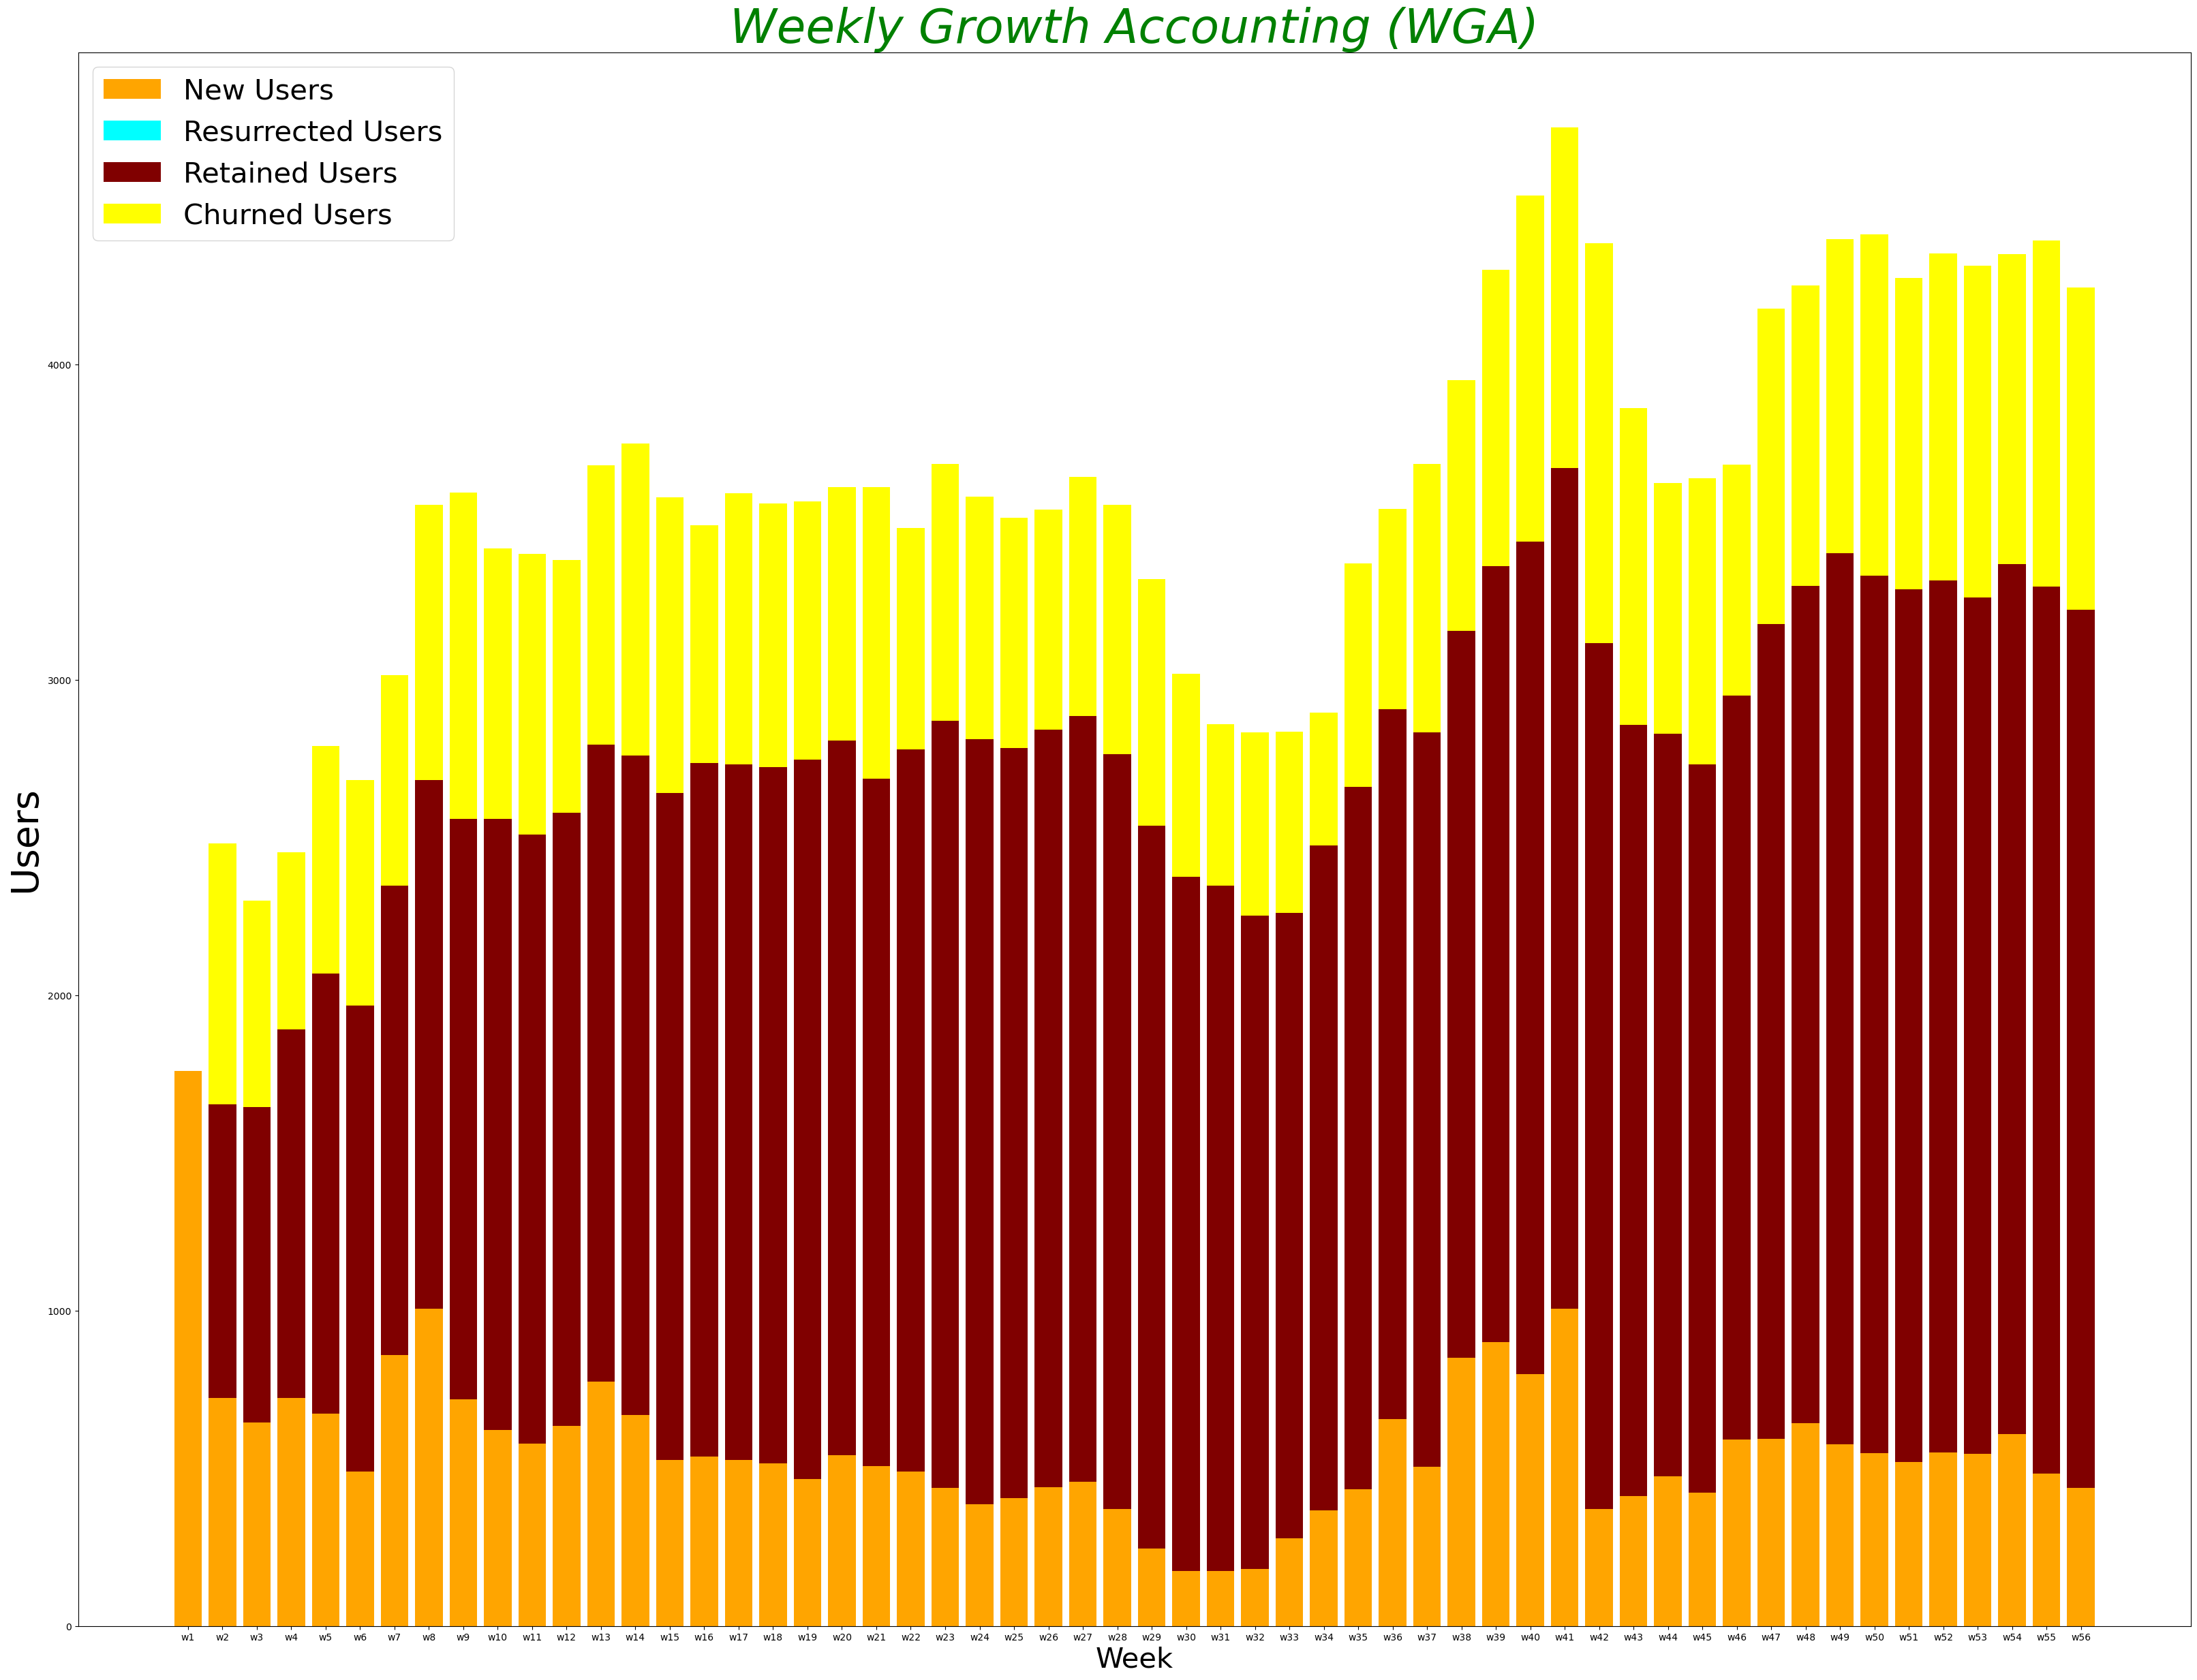

In [43]:
plt.figure(figsize=(40,30))

plt.bar(final['Week'], final['New Users'], label='New Users', color='orange')
plt.bar(final['Week'], final['Resurrected Users'], bottom=final['New Users'], label='Resurrected Users', color='cyan')
plt.bar(final['Week'], final['Retained Users'], bottom=final['New Users'] + final['Resurrected Users'], label='Retained Users', color='maroon')
plt.bar(final['Week'], final['Churned Users'], bottom=final['New Users'] + final['Resurrected Users'] + final['Retained Users'], label='Churned Users', color='yellow')

plt.xlabel('Week',fontsize=30)
plt.ylabel('Users',fontsize=40)
plt.title('Weekly Growth Accounting (WGA)',fontsize=50,fontstyle='italic',color='green')
plt.legend(fontsize=30)

plt.show()